In [14]:
!pip install python-dotenv
!pip install newsdataapi
!pip install openai
!pip install matplotlib

In [15]:
from dotenv import load_dotenv
from newsdataapi import NewsDataApiClient
import os
import openai
import requests


In [7]:
load_dotenv()

open_ai_api_key = os.getenv('OPENAI_API_KEY')
newsdata_api_key = os.getenv('NEWSIO_API_KEY')

newsdata_api = NewsDataApiClient(apikey=newsdata_api_key)

In [4]:
# Fetches the latest news articles based on the provided query
def get_news_articles(query):
    url = f'https://newsdata.io/api/1/latest?apikey={newsdata_api_key}&q={query}&language=en'
    response = requests.get(url)
    if (response.status_code == 200):
        return response.json()
    else:
        print("Error fetching articles.")
        return None

# Prompt the user to enter a query term for the news search
user_query = input("Enter a query for news articles: ")

data = get_news_articles(user_query)

Enter a query for news articles: Hamas


In [20]:
# Extract relevant article information for each article
article_info_list = [
    {
        'title': article['title'],
        'source_url': article['source_url'],
        'description': article['description'],
        'pub_date': article['pubDate']
    }
    for article in data['results'] if article.get('description')
]

# Convert the list of dictionaries to a DataFrame
article_info_df = pd.DataFrame(article_info_list)

# Display the DataFrame
print(article_info_df)

# Count the number of rows in the DataFrame
row_count = article_info_df.shape[0]
print("Row count:", row_count)

[{'title': 'Netanyahu aide arrested over Gaza hostage talks stories', 'source_url': 'https://www.recentlyheard.com', 'description': 'Arrests. Categorised paperwork. And suspected leaks that will have harmed efforts to free hostages held by Hamas so as, critics say, to offer Israeli Prime Minister Benjamin Netanyahu public cowl for failing to comply with a cease-fire deal. Netanyahu was engulfed in scandal Monday over a case involving one among his aides that has despatched ... Read moreThe post Netanyahu aide arrested over Gaza hostage talks stories appeared first on RecentlyHeard: Timely Updates on News, Politics, and Stories Unfolding Across the United States.', 'pub_date': '2024-11-05 07:18:35'}, {'title': 'TRUMP CLINGS TO CONSPIRACIES; HARRIS VISITS MICH. CHURCH', 'source_url': 'https://dothaneagle.com', 'description': 'LITITZ, Pa. — Donald Trump delivered a profane and conspiracy-laden speech two days before Tuesday\'s presidential election, talking about reporters being shot and 

In [21]:
# Set openai api key
openai.apikey = open_ai_api_key

client = openai.OpenAI()

def get_sentiment(text):
    prompt = f"Analyze the sentiment of the following text as positive, negative, or neutral. Respond with a single word: {text}"
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=10
    )
    return response.choices[0].message.content.strip()

# Initialize an empty list to store sentiments
sentiments = []

# Determine the number of articles to process (up to a maximum of 10)
num_articles = min(10, len(article_info_df))

# Iterate over the selected articles
for i in range(num_articles):
    # Get sentiment of the article's description
    article = article_info_df.iloc[i]
    sentiment = get_sentiment(article['description'])
    sentiments.append(sentiment)
    
    # Pause after every 3 requests to respect the API rate limit
    if (i + 1) % 3 == 0:
        time.sleep(61)

print(sentiments)

['Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative']


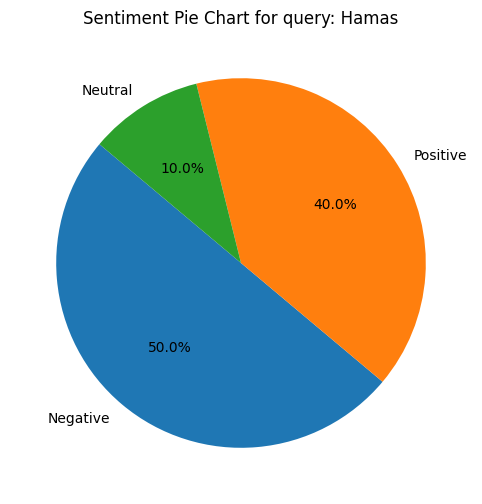

In [22]:
# Count occurrences of each keyword
keyword_counts = Counter(sentiments)

# Separate the data into labels and sizes for the pie chart
labels = keyword_counts.keys()
sizes = keyword_counts.values()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Sentiment Pie Chart for query: {user_query}')
plt.show()